<h1> ML project on Lung Cancer Detection</h1> 
<h3>Using a CNN model, Random Forest Classifier and an SVM and Comparing their Performances</h3>

<h3>Dataset used is IQ-OTH/NCCD - Lung Cancer Dataset</h3>

<h4> V Susena and V Sharmila </h4>

<h2> Importing the necessary libraries

In [1]:
import os
import cv2
import numpy as np

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

2024-03-27 05:37:01.571662: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-27 05:37:01.571801: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-27 05:37:01.856854: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<h2> Load Images from directory and set the Labels

In [2]:
def load_images_from_dir(directory, label):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png"): 
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = cv2.resize(img, (128, 128))  # Resize images to a fixed size
                images.append(img)
                labels.append(label)
    return images, labels

In [3]:
benign_dir = r"/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Bengin cases"
malignant_dir = r"/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Malignant cases"
normal_dir = r"/kaggle/input/iqothnccd-lung-cancer-dataset/The IQ-OTHNCCD lung cancer dataset/The IQ-OTHNCCD lung cancer dataset/Normal cases"

In [4]:
benign_images, benign_labels = load_images_from_dir(benign_dir, label=0)  # Assign label 0 for benign cases
malignant_images, malignant_labels = load_images_from_dir(malignant_dir, label=1)  # Assign label 1 for malignant cases
normal_images, normal_labels = load_images_from_dir(normal_dir, label=2)  # Assign label 2 for normal cases

In [5]:
images = benign_images + malignant_images + normal_images
labels = benign_labels + malignant_labels + normal_labels

In [6]:
images = np.array(images)
labels = np.array(labels)

<h2> Train Test and Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

<h2>Visualisation

In [8]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

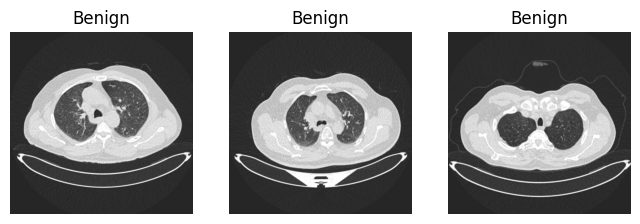

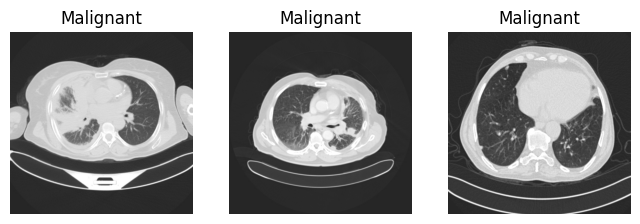

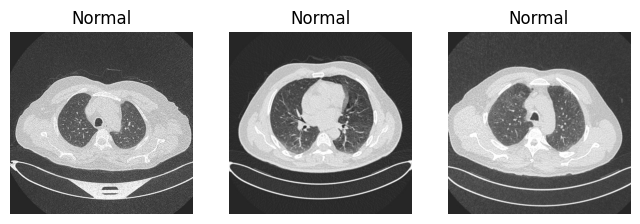

In [9]:
# Define the categories and their corresponding image paths
categories = {
    "Benign": benign_dir,
    "Malignant": malignant_dir,
    "Normal": normal_dir
}

# Iterate over categories
for category, image_dir in categories.items():
    # Load images from the directory
    image_paths = [os.path.join(image_dir, filename) for filename in os.listdir(image_dir) if filename.endswith(('.jpg', '.png'))]
    
    # Create subplots for each category
    fig, ax = plt.subplots(1, 3, figsize=(8, 8))
    ax = ax.ravel()
    
    # Randomly sample 3 images from each category
    for i, img_path in enumerate(np.random.choice(image_paths, size=3, replace=False)):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct display
        ax[i].imshow(img)
        ax[i].axis("off")
        ax[i].set_title(category)
    
    plt.show()

In [10]:
# Create a DataFrame with the counts of each category
count_data = pd.DataFrame({
    "label": ["Benign", "Malignant", "Normal"],
    "count": [len(benign_images), len(malignant_images), len(normal_images)]
})

# Create histogram using Plotly Express
fig = px.histogram(data_frame=count_data, x="label", y="count", color="label")

# Show the histogram
fig.show()

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


<h2>CNN Model

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 output classes: benign, malignant, normal
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train_encoded = to_categorical(y_train, num_classes=3)
y_test_encoded = to_categorical(y_test, num_classes=3)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train_encoded:", y_train_encoded.shape)

history = model.fit(X_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)

print("Training history:", history.history)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Shape of X_train: (877, 128, 128)
Shape of y_train_encoded: (877, 3)
Epoch 1/10
 6/22 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4749 - loss: 125.8117

I0000 00:00:1711517874.646288      82 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1711517874.668093      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step - accuracy: 0.5158 - loss: 71.2383

W0000 00:00:1711517883.976644      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1711517884.693927      82 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22/22 ━━━━━━━━━━━━━━━━━━━━ 22s 535ms/step - accuracy: 0.5199 - loss: 69.4504 - val_accuracy: 0.8864 - val_loss: 0.5157
Epoch 2/10
 9/22 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8280 - loss: 0.4817

W0000 00:00:1711517885.914974      81 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8339 - loss: 0.4727 - val_accuracy: 0.9091 - val_loss: 0.3271
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9123 - loss: 0.2644 - val_accuracy: 0.9602 - val_loss: 0.1405
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9805 - loss: 0.0821 - val_accuracy: 0.9602 - val_loss: 0.1032
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9866 - loss: 0.0465 - val_accuracy: 0.9773 - val_loss: 0.0555
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9726 - loss: 0.0561 - val_accuracy: 0.9830 - val_loss: 0.0590
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9891 - loss: 0.0435 - val_accuracy: 0.9773 - val_loss: 0.0720
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9867 - loss: 0.0505 - val_accuracy: 0.9716 - val_loss: 0.0901
Epoch 9/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9754 - loss: 0.0647 - val_accuracy: 0.9773 - val_loss: 0.

In [12]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

def history_plot(history):
    epochs = len(history.history['accuracy'])
    fig1 = make_subplots()
    fig1.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["accuracy"], name="Training Accuracy"))
    fig1.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["val_accuracy"], name="Validation Accuracy"))
    fig1.update_layout(title="Training and Validation Accuracy", xaxis_title="Epoch", yaxis_title="Accuracy")
    fig1.show()

    fig2 = make_subplots()
    fig2.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["loss"], name="Training Loss"))
    fig2.add_trace(go.Scatter(x=np.arange(1, epochs + 1), y=history.history["val_loss"], name="Validation Loss"))
    fig2.update_layout(title="Training and Validation Loss", xaxis_title="Epoch", yaxis_title="Loss")
    fig2.show()

history_plot(history)


In [13]:
y_test_encoded = to_categorical(y_test, num_classes=3)

test_loss, test_acc = model.evaluate(X_test, y_test_encoded)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 218ms/step - accuracy: 0.9461 - loss: 0.3205
Test Loss: 0.23202843964099884
Test Accuracy: 0.9545454382896423


W0000 00:00:1711517891.496946      80 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


<h2>Random Forest Classifier

In [14]:
X = np.array(images)
y = np.array(labels)

X_flat = X.reshape(X.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(X_flat, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9409090909090909


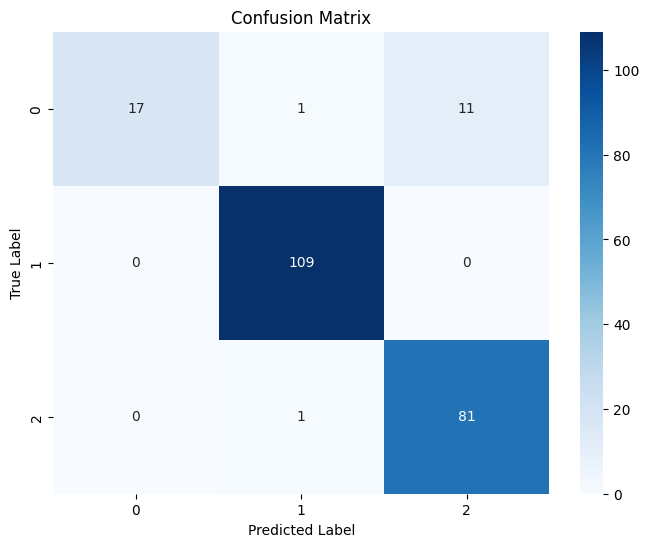

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_test)  # Assuming y_test is your true labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<h2>SVM

In [16]:
X, y = make_classification(n_samples=1200, n_features=20, n_classes=3, n_clusters_per_class=1, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

np.random.seed(42)
noise_indices = np.random.choice(len(y_train), size=int(0.2 * len(y_train)), replace=False)
y_train[noise_indices] = np.random.randint(0, 3, size=len(noise_indices))  # Randomly assign new labels

svm_classifier = SVC(kernel='linear')

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.925


<h2>SVM Visualization

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Test Accuracy: 0.9041666666666667


/tmp/ipykernel_27/538372250.py:32: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



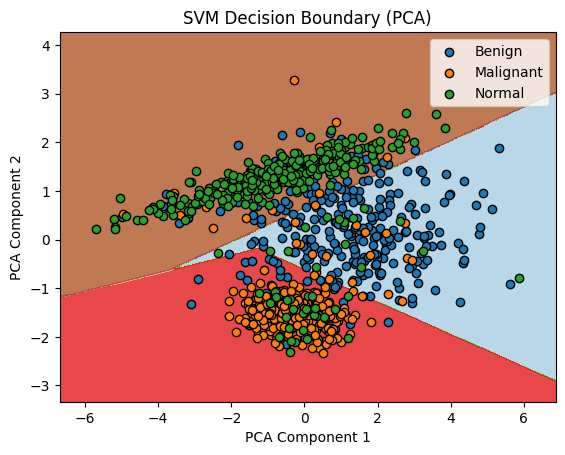

In [18]:
# Reduce feature space to two dimensions using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train SVM classifier on reduced feature space
svm_classifier.fit(X_train_pca, y_train)

# Make predictions on test data
y_pred = svm_classifier.predict(X_test_pca)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)


class_labels = ['Benign', 'Malignant', 'Normal']

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = svm_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

# Plot the training points with labels
for i in range(len(class_labels)):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], 
                edgecolors='k', cmap=plt.cm.Paired, label=class_labels[i])


    
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary (PCA)')
plt.legend()
plt.show()

<h2>Logistic regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Introduce noise to the training data
np.random.seed(42)
noise_indices = np.random.choice(len(y_train), size=int(0.2 * len(y_train)), replace=False)
y_train[noise_indices] = 1 - y_train[noise_indices]  # Flip the labels for selected indices

# Initialize Logistic Regression classifier
logistic_regression = LogisticRegression(max_iter=1000, C=1.0)  # Adjust regularization strength if needed

# Train the Logistic Regression classifier
logistic_regression.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = logistic_regression.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.865
